In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import talib as ta
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.pyplot import plot as plot
from numpy import inf, arange, array, linspace, exp, log, power, pi, cos, sin, radians, degrees
import pandas_datareader as pdr
import quandl 
import datetime

In [2]:
# get data by quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

In [5]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change[:10])

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns[:10])

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
2006-10-09    0.005509
2006-10-10   -0.011048
2006-10-11   -0.007889
2006-10-12    0.027344
2006-10-13   -0.003194


In [7]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
print(monthly.pct_change()[:10])

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
print(quarter.pct_change()[:10])    


                Open      High       Low     Close    Volume  Ex-Dividend  \
Date                                                                        
2006-10-31       NaN       NaN       NaN       NaN       NaN          NaN   
2006-11-30  0.132167  0.134672  0.134987  0.130488  0.735854          NaN   
2006-12-29 -0.089628 -0.078550 -0.084560 -0.074405  0.236584          NaN   
2007-01-31  0.010840  0.007026  0.011876  0.010490 -0.204714          NaN   
2007-02-28 -0.021918 -0.004651 -0.016005 -0.013064  0.074066          NaN   
2007-03-30  0.135904  0.106075  0.117470  0.098097 -0.346847          NaN   
2007-04-30  0.061625  0.066751  0.074609  0.074158  0.026561          NaN   
2007-05-31  0.199620  0.209604  0.199368  0.214339  1.103887          NaN   
2007-06-29  0.015824  0.014979  0.012958  0.007005 -0.122758          NaN   
2007-07-31  0.172173  0.157097  0.086134  0.079646  0.548891          NaN   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date

                Open      High       Low     Close    Volume  Ex-Dividend  \
Date                                                                        
2006-10-31       NaN       NaN       NaN       NaN       NaN          NaN   
2006-11-30  0.132167  0.134672  0.134987  0.130488  0.735854          NaN   
2006-12-29 -0.089628 -0.078550 -0.084560 -0.074405  0.236584          NaN   
2007-01-31  0.010840  0.007026  0.011876  0.010490 -0.204714          NaN   
2007-02-28 -0.021918 -0.004651 -0.016005 -0.013064  0.074066          NaN   
2007-03-30  0.135904  0.106075  0.117470  0.098097 -0.346847          NaN   
2007-04-30  0.061625  0.066751  0.074609  0.074158  0.026561          NaN   
2007-05-31  0.199620  0.209604  0.199368  0.214339  1.103887          NaN   
2007-06-29  0.015824  0.014979  0.012958  0.007005 -0.122758          NaN   
2007-07-31  0.172173  0.157097  0.086134  0.079646  0.548891          NaN   
2007-08-31 -0.024341 -0.026694  0.044784  0.051002 -0.502445          NaN   

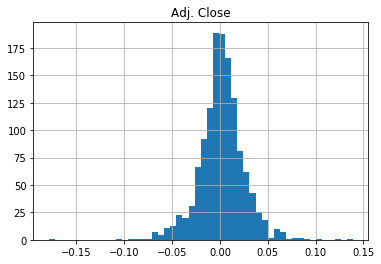

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [9]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1)-1
# print(daily_pct_change)

daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137


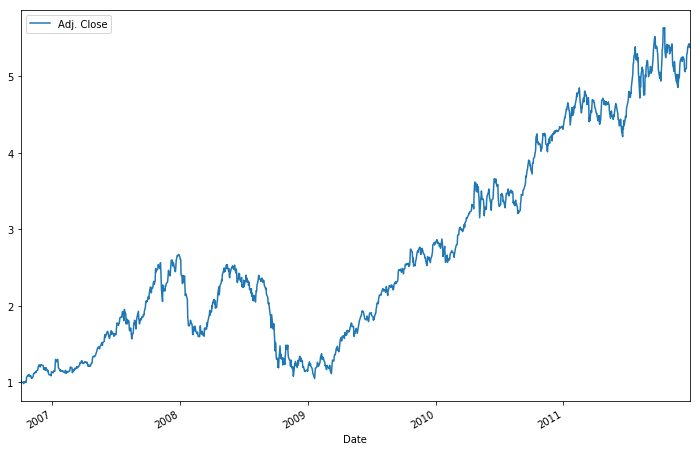

In [11]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return[:10])

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

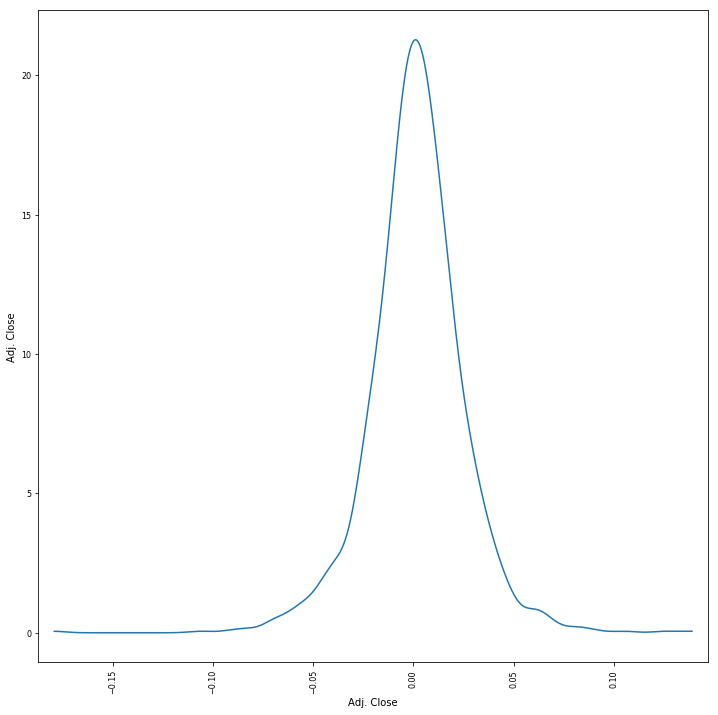

In [13]:

# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [15]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800.0   
       2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200.0   
       2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700.0   
       2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800.0   
       2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   7.130981  
       2006-10-03   7.056683  
       2006-10-04   7.180516  
       2006-10-05   7.128126  
       2006-10-06   7.070017

In [16]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64


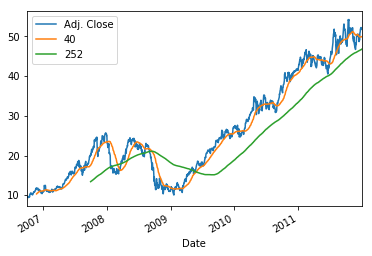

In [17]:
# Short moving window rolling mean
aapl['40'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj. Close', '40', '252']].plot()

# Show plot
plt.show()  

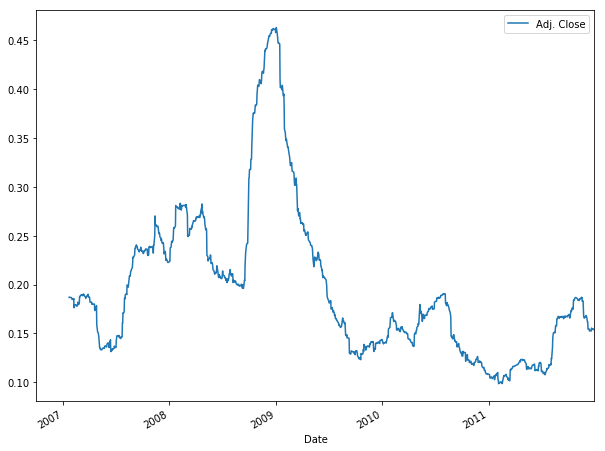

In [18]:
# Volatility Calculation

# Define the minumum of periods to consider 
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()
